<a href="https://colab.research.google.com/github/felix7974/-/blob/main/4_3_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4-3. 당뇨병 건강 지표 데이터 세트(Diabetes Health Indicators Dataset)
- Draft written by Seunghun Shin, revised by Hyeonseung Im
- link : https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset

In [ ]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow import keras

import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

print(tf.__version__)

2.11.0


## 탐색적 데이터 분석

In [ ]:
df = pd.read_csv('/content/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

In [ ]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', 50)
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.00,70692.00,70692.00,70692.00,70692.00,70692.00,70692.00,70692.00,70692.00,70692.00,70692.00,70692.00,70692.00,70692.00,70692.00,70692.00,70692.00,70692.00,70692.00,70692.00,70692.00,70692.00
mean,0.50,0.56,0.53,0.98,29.86,0.48,0.06,0.15,0.70,0.61,0.79,0.04,0.95,0.09,2.84,3.75,5.81,0.25,0.46,8.58,4.92,5.70
std,0.50,0.50,0.50,0.16,7.11,0.50,0.24,0.35,0.46,0.49,0.41,0.20,0.21,0.29,1.11,8.16,10.06,0.43,0.50,2.85,1.03,2.18
min,0.00,0.00,0.00,0.00,12.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00
25%,0.00,0.00,0.00,1.00,25.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,2.00,0.00,0.00,0.00,0.00,7.00,4.00,4.00
50%,0.50,1.00,1.00,1.00,29.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,3.00,0.00,0.00,0.00,0.00,9.00,5.00,6.00
75%,1.00,1.00,1.00,1.00,33.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,4.00,2.00,6.00,1.00,1.00,11.00,6.00,8.00
max,1.00,1.00,1.00,1.00,98.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,5.00,30.00,30.00,1.00,1.00,13.00,6.00,8.00


In [ ]:
duplicates = df[df.duplicated()]
duplicates

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
602,0.00,0.00,0.00,1.00,22.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,6.00,6.00,8.00
689,0.00,0.00,0.00,1.00,26.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,6.00,6.00,8.00
891,0.00,0.00,0.00,1.00,24.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,6.00,6.00,8.00
1092,0.00,0.00,0.00,1.00,21.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,5.00,6.00,8.00
1326,0.00,1.00,0.00,1.00,29.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,2.00,0.00,0.00,0.00,1.00,10.00,5.00,6.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69865,1.00,1.00,1.00,1.00,27.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,4.00,0.00,0.00,0.00,1.00,12.00,6.00,8.00
69939,1.00,1.00,1.00,1.00,27.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,3.00,0.00,0.00,0.00,1.00,12.00,6.00,8.00
70305,1.00,1.00,0.00,1.00,30.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,3.00,0.00,0.00,0.00,1.00,9.00,4.00,7.00
70591,1.00,1.00,1.00,1.00,30.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00,2.00,0.00,0.00,0.00,1.00,10.00,6.00,8.00


In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 10
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f225dbe8850>,
      dtype=object)

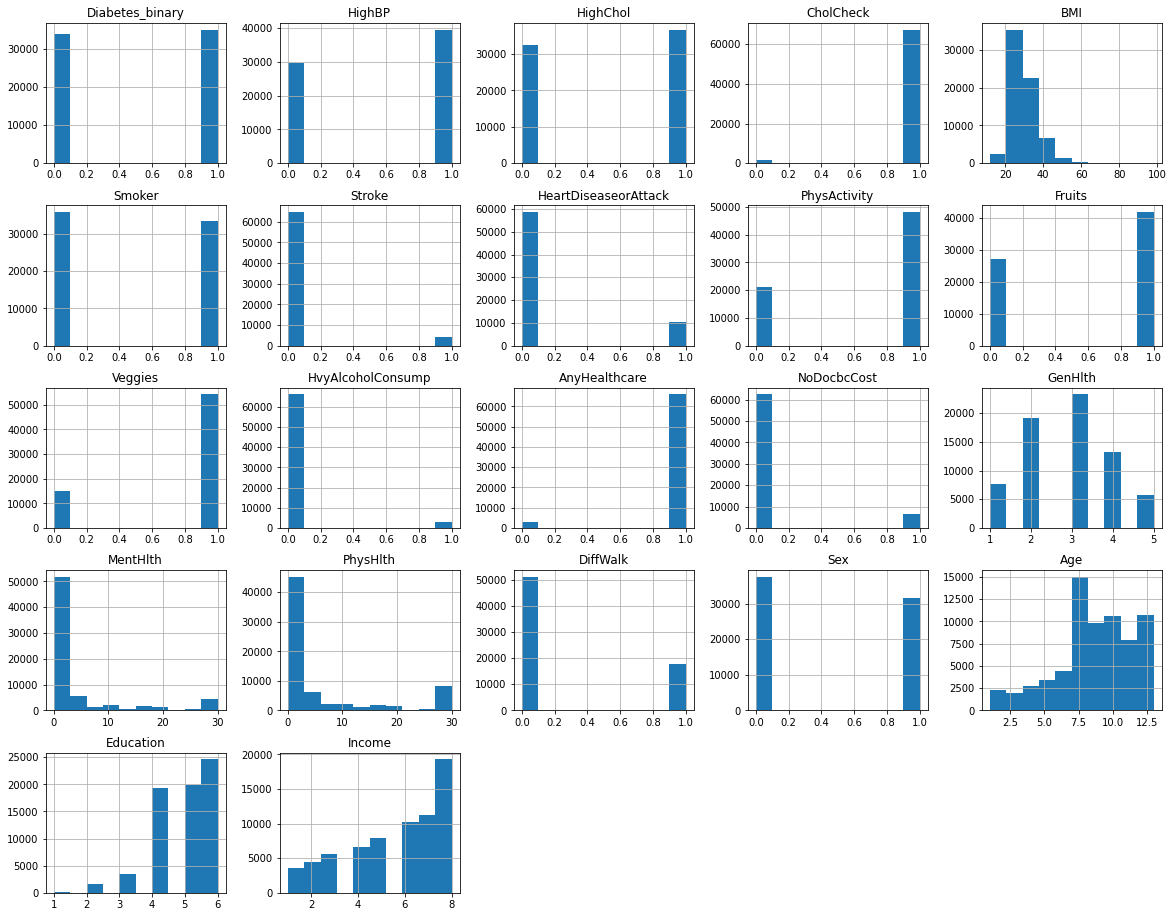

In [ ]:
df.hist(figsize = (20,16))

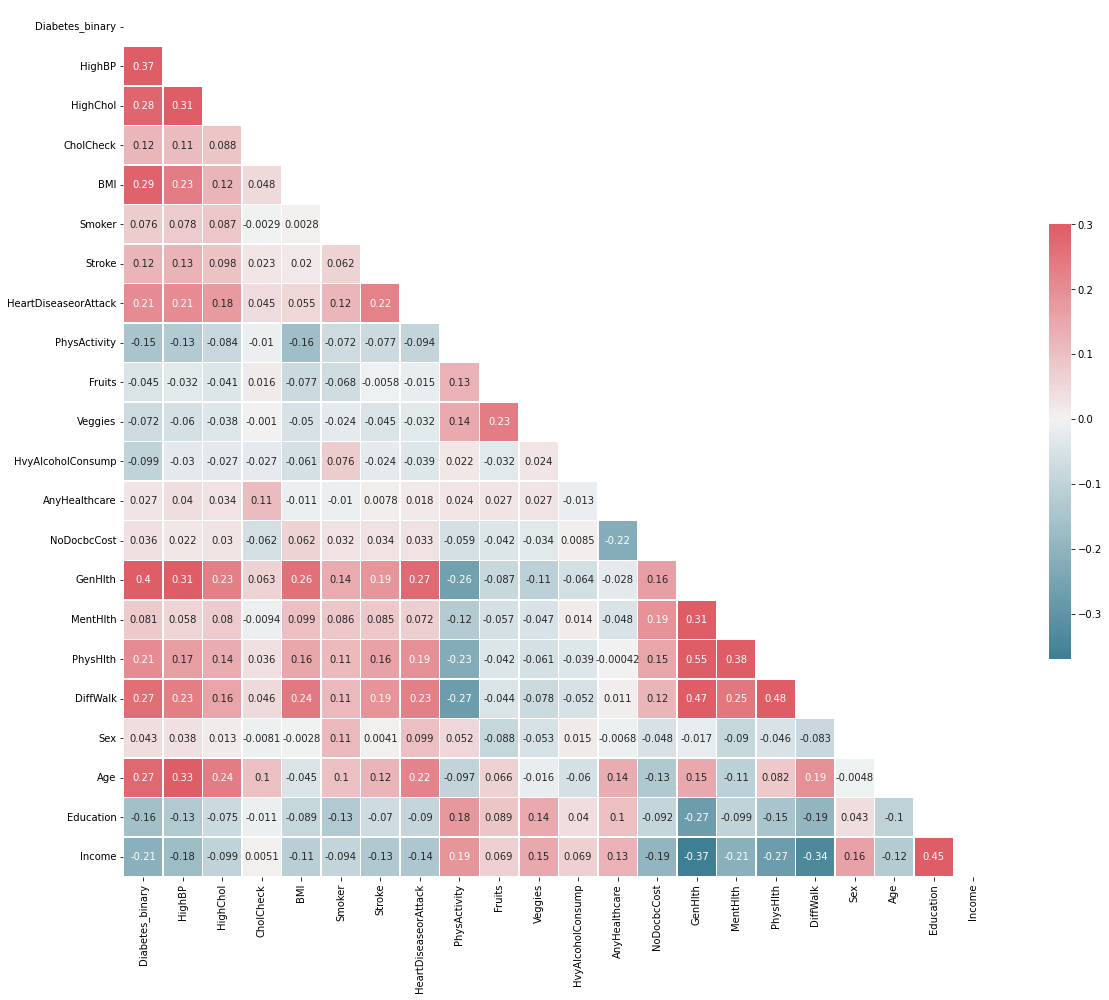

In [ ]:
corr = df.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 16))

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [ ]:
pd.crosstab(df['Diabetes_binary'], df['HighBP'], normalize=True)

HighBP,0.00,1.00
Diabetes_binary,,
0.00,0.30,0.19
1.00,0.13,0.38


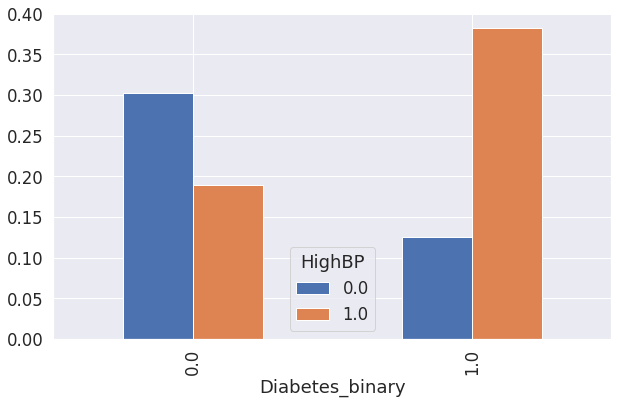

In [ ]:
sns.set(font_scale=1.5)
pd.crosstab(df['Diabetes_binary'], df['HighBP'], normalize=True).plot(kind="bar",figsize=(10,6))

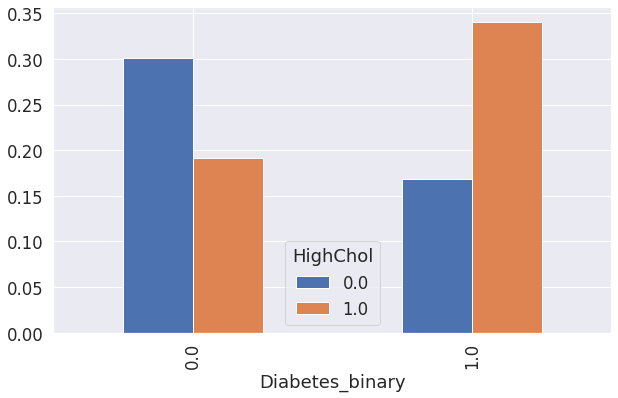

In [ ]:
pd.crosstab(df['Diabetes_binary'], df['HighChol'], normalize=True).plot(kind="bar",figsize=(10,6))

## DNN 모델 훈련 및 예측

In [ ]:
train_df, test_df = train_test_split(df, test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)
y_train = np.array(train_df.pop('Diabetes_binary'))
y_val = np.array(val_df.pop('Diabetes_binary'))
y_test = np.array(test_df.pop('Diabetes_binary'))

X_train = np.array(train_df)
X_val = np.array(val_df)
X_test = np.array(test_df)

In [ ]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
X_train[:5]

array([[1.        , 0.        , 1.        , 0.17647059, 0.        ,
        0.        , 0.        , 0.        , 1.        , 1.        ,
        0.        , 1.        , 0.        , 0.75      , 0.        ,
        0.03333333, 0.        , 1.        , 0.91666667, 0.6       ,
        0.28571429],
       [0.        , 0.        , 1.        , 0.16470588, 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.41666667, 0.8       ,
        1.        ],
       [1.        , 1.        , 1.        , 0.2       , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 1.        , 0.06666667,
        0.13333333, 1.        , 1.        , 0.5       , 0.6       ,
        0.57142857],
       [1.        , 0.        , 1.        , 0.10588235, 0.        ,
        0.        , 0.        , 1.        , 1.       

In [ ]:
print('y_train:', y_train.shape)
print('y_val:', y_val.shape)
print('Test labels shape:', y_test.shape)
print()
print('Training features shape:', X_train.shape)
print('Validation features shape:', X_val.shape)
print('Test features shape:', X_test.shape)

y_train: (44196,)
y_val: (11049,)
Test labels shape: (13812,)

Training features shape: (44196, 21)
Validation features shape: (11049, 21)
Test features shape: (13812, 21)


In [ ]:
METRICS = [
    keras.metrics.BinaryAccuracy(name='accuracy'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall'),
    keras.metrics.AUC(name='auc'),
]

In [ ]:
def make_model(metrics=METRICS):
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu',
                           input_shape=(X_train.shape[-1],)),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(.1),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=1e-3),
        loss=keras.losses.BinaryCrossentropy(),
        metrics=metrics)

    return model

In [ ]:
EPOCHS = 100
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc',
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [ ]:
model = make_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1408      
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 26,369
Trainable params: 26,369
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(X_val, y_val))

Epoch 1/100
22/22 [==============================] - 6s 99ms/step - loss: 0.6193 - accuracy: 0.6659 - precision: 0.6608 - recall: 0.7071 - auc: 0.7294 - val_loss: 0.5661 - val_accuracy: 0.7176 - val_precision: 0.7244 - val_recall: 0.7122 - val_auc: 0.7826
Epoch 2/100
22/22 [==============================] - 1s 49ms/step - loss: 0.5492 - accuracy: 0.7261 - precision: 0.7188 - recall: 0.7591 - auc: 0.7933 - val_loss: 0.5411 - val_accuracy: 0.7289 - val_precision: 0.7165 - val_recall: 0.7672 - val_auc: 0.7990
Epoch 3/100
22/22 [==============================] - 1s 39ms/step - loss: 0.5340 - accuracy: 0.7344 - precision: 0.7172 - recall: 0.7901 - auc: 0.8044 - val_loss: 0.5318 - val_accuracy: 0.7335 - val_precision: 0.7178 - val_recall: 0.7787 - val_auc: 0.8054
Epoch 4/100
22/22 [==============================] - 1s 45ms/step - loss: 0.5261 - accuracy: 0.7398 - precision: 0.7190 - recall: 0.8030 - auc: 0.8101 - val_loss: 0.5280 - val_accuracy: 0.7361 - val_precision: 0.7279 - val_recall: 0

In [ ]:
train_predictions = model.predict(X_train, batch_size=BATCH_SIZE)
test_predictions = model.predict(X_test, batch_size=BATCH_SIZE)

7/7 [==============================] - 0s 5ms/step


In [ ]:
def plot_metrics(history):
    metrics = ['loss', 'auc', 'precision', 'recall']
    for n, metric in enumerate(metrics):
        name = metric.replace("_"," ").capitalize()
        plt.subplot(2,2,n+1)
        plt.plot(history. epoch, history.history[metric], color=colors[0], label='Train')
        plt.plot(history. epoch, history.history['val_'+metric],
                 color=colors[1], linestyle="--", label='Val')
        plt.xlabel('Epoch')
        plt.ylabel(name)
        if metric == 'loss':
            plt.ylim([0, 1])
        elif metric == 'auc':
            plt.ylim([0.2,1])
        else:
            plt.ylim([0,1])

        plt.legend()

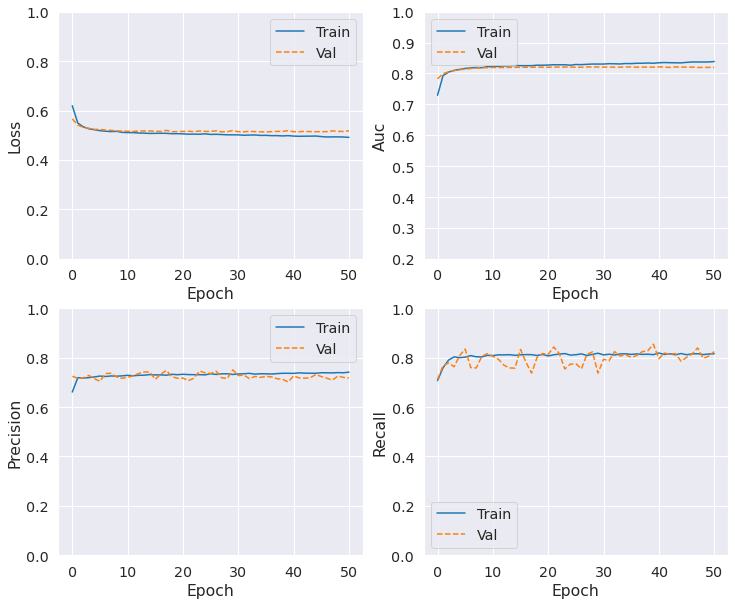

In [ ]:
plot_metrics(history)

In [ ]:
def plot_cm(labels, predictions, p=0.5):
    cm = confusion_matrix(labels, predictions > p)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    print('True Negatives: ', cm[0][0])
    print('False Positives: ', cm[0][1])
    print('False Negatives: ', cm[1][0])
    print('True Positives: ', cm[1][1])

loss:  0.5142
accuracy:  0.7451
precision:  0.7278
recall:  0.7945
auc:  0.8219

True Negatives:  4728
False Positives:  2081
False Negatives:  1439
True Positives:  5564


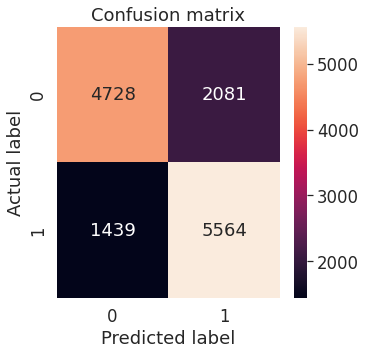

In [ ]:
results = model.evaluate(X_test, y_test,
                        batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, results):
    print(f'{name}:  {value:.4f}')
print()

sns.set(font_scale=1.5)
plot_cm(y_test, test_predictions)

In [ ]:
def plot_roc(name, labels, predictions, **kwargs):
    fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

    plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
    plt.xlabel('False positives [%]')
    plt.ylabel('True positives [%]')
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')

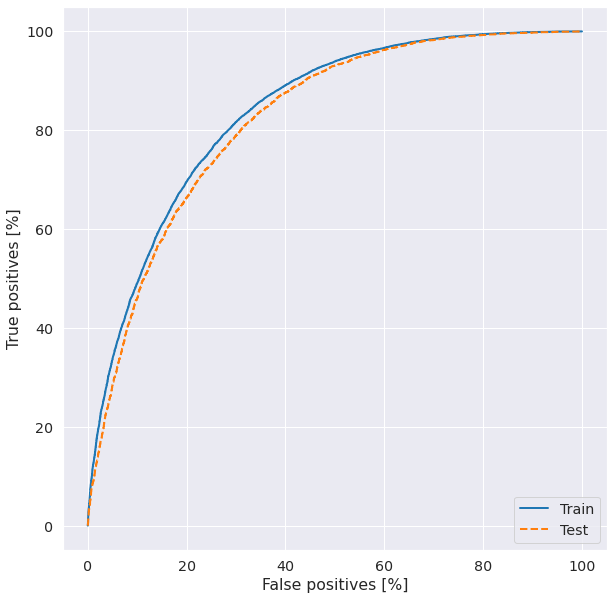

In [ ]:
plot_roc("Train", y_train, train_predictions, color=colors[0])
plot_roc("Test", y_test, test_predictions, color=colors[1], linestyle='--')
plt.legend(loc='lower right');